In [50]:
import random
import matplotlib.pyplot as plt
import math
import os
import time

In [51]:
font_name_win="MS Gothic"
font_name_lin="Noto Sans CJK JP"
if os.name=="nt":
    font_name=font_name_win
else:
    font_name=font_name_li

In [52]:
n=64
x=[ 
226,161, 55,225,237,  7,  9,  8,185,224,225, 88, 92,110, 62,218, 61, 33,138,145,145, 29,253,195,205,150, 53,145,106,183,239,104,247, 41,206,159, 20,147, 24,108, 43, 23,220,128,248,229,210,199, 92,  3,189, 90, 90,208, 22,150,  7,122, 32,133,172,199,144,177,
]
y=[
 23, 48,103,141,137, 60, 27,192,182,163,161,196,141,134,  1,  8,152, 62, 12,123, 37,212,121,228, 10,123,136,164, 69,102, 25,235,117, 72, 16,131,214,186, 18, 91,123,250, 40, 68, 53,110, 12, 31,247,178,204,253,139,127,178, 40,183,189,163,186,206, 57,248,196,
]

In [53]:
def distance(i,j):
    return ((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5

def total_distance(v):
    d=0
    for i in range(n-1):
        d+=distance(v[i],v[i+1])
    d+=distance(v[n-1],v[0])
    return d

In [54]:
# ランダム解
v=[i for i in range(n)]
#random.shuffle(v)

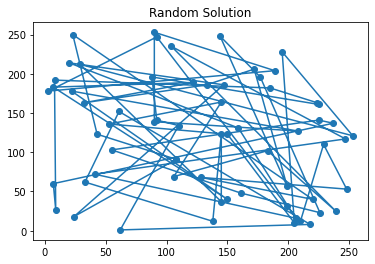

Total distance: 8426.14185127847


In [55]:
plt.clf()
plt.title("Random Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total distance:",total_distance(v))

In [56]:
# 山登り、局所最適到達
start_temp=300
end_temp=0.001
total_iteration=10000
start_time=time.time()
for cnt in range(total_iteration):
    temp=start_temp+(end_temp-start_temp)*cnt/total_iteration
    if cnt%1000==0:
        print(f"cnt={cnt} temp={temp} total_distance={total_distance(v)} time={time.time()-start_time}")
    i=random.randint(0,n-1)
    j=random.randint(0,n-1)
    if abs(i-j)<=1 or abs(i-j)>=n-1:
        if (i+1)%n!=j:
            i,j=j,i
        dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(i+1)%n],v[(i+2)%n])
        dist2=distance(v[(i-1)%n],v[(i+1)%n])+distance(v[(i+1)%n],v[i])+distance(v[i],v[(i+2)%n])
    else:
        dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(j-1)%n],v[j])+distance(v[j],v[(j+1)%n])
        dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    if dist2<dist1:
        v[i],v[j]=v[j],v[i]
#    else:
#        prob=math.exp((dist1-dist2)/temp)
#        if random.random()<prob:
#            v[i],v[j]=v[j],v[i]

cnt=0 temp=300.0 total_distance=8426.14185127847 time=0.0
cnt=1000 temp=270.0001 total_distance=3838.6167332647124 time=0.007968425750732422
cnt=2000 temp=240.0002 total_distance=3304.864212963345 time=0.014969587326049805
cnt=3000 temp=210.00029999999998 total_distance=3226.82885604326 time=0.02297186851501465
cnt=4000 temp=180.0004 total_distance=3129.195429954304 time=0.028998851776123047
cnt=5000 temp=150.0005 total_distance=2997.110118045901 time=0.03496694564819336
cnt=6000 temp=120.00059999999996 total_distance=2948.7067405127655 time=0.04203438758850098
cnt=7000 temp=90.0007 total_distance=2900.3244571173436 time=0.04803967475891113
cnt=8000 temp=60.0008 total_distance=2889.77450002411 time=0.05507636070251465
cnt=9000 temp=30.0009 total_distance=2858.5420329270823 time=0.06103992462158203


In [57]:
# 山登り、局所最適到達
# ランダム解
v=[i for i in range(n)]
#random.shuffle(v)
start_temp=300
end_temp=0.001
total_iteration=10000
start_time=time.time()
for cnt in range(total_iteration):
    temp=start_temp+(end_temp-start_temp)*cnt/total_iteration
    if cnt%1000==0:
        print(f"cnt={cnt} temp={temp} total_distance={total_distance(v)} time={time.time()-start_time}")
    i=random.randint(0,n-1)
    j=random.randint(0,n-1)
    if abs(i-j)<=1 or abs(i-j)>=n-1:
        if (i+1)%n!=j:
            i,j=j,i
        dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(i+1)%n],v[(i+2)%n])
        dist2=distance(v[(i-1)%n],v[(i+1)%n])+distance(v[(i+1)%n],v[i])+distance(v[i],v[(i+2)%n])
    else:
        dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(j-1)%n],v[j])+distance(v[j],v[(j+1)%n])
        dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    if dist2<dist1:
        v[i],v[j]=v[j],v[i]
#    else:
#        prob=math.exp((dist1-dist2)/temp)
#        if random.random()<prob:
#            v[i],v[j]=v[j],v[i]

cnt=0 temp=300.0 total_distance=8426.14185127847 time=0.0
cnt=1000 temp=270.0001 total_distance=4164.856294449849 time=0.006044149398803711
cnt=2000 temp=240.0002 total_distance=3807.830929231812 time=0.012030601501464844
cnt=3000 temp=210.00029999999998 total_distance=3604.8397382297253 time=0.019083499908447266
cnt=4000 temp=180.0004 total_distance=3272.527157758293 time=0.02609419822692871
cnt=5000 temp=150.0005 total_distance=2941.280490982041 time=0.032067060470581055
cnt=6000 temp=120.00059999999996 total_distance=2896.6078099632145 time=0.038064002990722656
cnt=7000 temp=90.0007 total_distance=2825.6335517355196 time=0.04605507850646973
cnt=8000 temp=60.0008 total_distance=2824.339105387229 time=0.053055763244628906
cnt=9000 temp=30.0009 total_distance=2790.041330569896 time=0.06006288528442383


<Figure size 432x288 with 0 Axes>

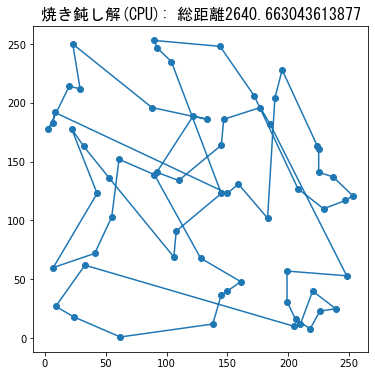

Total Distance: 2640.663043613877


In [58]:
plt.clf()
plt.figure(figsize=(6,6))
plt.title(f"焼き鈍し解(CPU): 総距離{total_distance(v)}", fontname=font_name, fontsize=16)
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total Distance:",total_distance(v))

In [59]:
v=[0]
used=[False for i in range(n)]
used[0]=True
for i in range(n-1):
    best=-1
    for j in range(n):
        if used[j]:
            continue
        if best==-1 or distance(v[i],j)<distance(v[i],best):
            best=j
    v.append(best)
    used[best]=True

<Figure size 432x288 with 0 Axes>

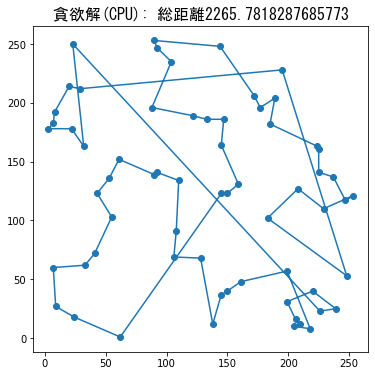

Total Distance: 2265.7818287685773


In [60]:
plt.clf()
plt.figure(figsize=(6,6))
plt.title(f"貪欲解(CPU): 総距離{total_distance(v)}", fontname=font_name, fontsize=16)
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total Distance:",total_distance(v))

In [61]:
start_temp=10
end_temp=0.001
total_iteration=1000000
for cnt in range(total_iteration):
    temp=start_temp+(end_temp-start_temp)*cnt/total_iteration
    if cnt%10000==0:
        print(f"cnt={cnt} temp={temp} total_distance={total_distance(v)}")
    i=random.randint(0,n-1)
    j=random.randint(0,n-1)
    if i==j:
        continue
    elif abs(i-j)<=1 or abs(i-j)>=n-1:
        dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(i+1)%n],v[j])+distance(v[j],v[(j+1)%n])
        dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    else:
        dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(j-1)%n],v[j])+distance(v[j],v[(j+1)%n])
        dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    if dist2<dist1:
        v[i],v[j]=v[j],v[i]
    else:
        prob=math.exp((dist1-dist2)/temp)
        if random.random()<prob:
            v[i],v[j]=v[j],v[i]

cnt=0 temp=10.0 total_distance=2265.7818287685773
cnt=10000 temp=9.90001 total_distance=2982.6996614115615
cnt=20000 temp=9.80002 total_distance=3004.0553378809223
cnt=30000 temp=9.70003 total_distance=3012.642697109728
cnt=40000 temp=9.60004 total_distance=2804.750207027121
cnt=50000 temp=9.50005 total_distance=3279.9561603117727
cnt=60000 temp=9.40006 total_distance=3035.441411581257
cnt=70000 temp=9.30007 total_distance=3102.4408855751594
cnt=80000 temp=9.20008 total_distance=2903.804128974297
cnt=90000 temp=9.10009 total_distance=2757.779792266757
cnt=100000 temp=9.0001 total_distance=3019.922835771251
cnt=110000 temp=8.90011 total_distance=2896.237359033166
cnt=120000 temp=8.80012 total_distance=3215.573019162771
cnt=130000 temp=8.70013 total_distance=2796.92255249784
cnt=140000 temp=8.60014 total_distance=3055.96300486564
cnt=150000 temp=8.50015 total_distance=2696.636151237544
cnt=160000 temp=8.40016 total_distance=2769.4568231987173
cnt=170000 temp=8.30017 total_distance=2880.1

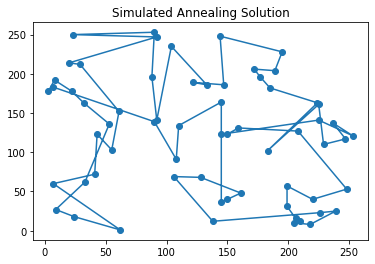

Total Distance: 2622.7400622820387


In [62]:
plt.clf()
plt.title("Simulated Annealing Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total Distance:",total_distance(v))